# Lec 18: Regularization and Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore', FutureWarning) # Seaborn triggers warnings in scipy
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline

In [2]:
# Configure nice plotting defaults - (this must be done in a cell separate
# from %matplotlib call)
plt.style.use('seaborn')
sns.set_context('talk', font_scale=1.4)
plt.rcParams['figure.figsize'] = (10, 7)

## Overfitting Example

In [5]:
vehicle_data = sns.load_dataset('mpg').dropna()
vehicle_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
from sklearn.utils import shuffle
np.random.seed(45)
vehicle_data = shuffle(vehicle_data)
vehicle_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
193,24.0,6,200.0,81.0,3012,17.6,76,usa,ford maverick
261,18.1,6,258.0,120.0,3410,15.1,78,usa,amc concord d/l
221,17.5,8,305.0,145.0,3880,12.5,77,usa,chevrolet caprice classic
163,18.0,6,225.0,95.0,3785,19.0,75,usa,plymouth fury
390,32.0,4,144.0,96.0,2665,13.9,82,japan,toyota celica gt


In [7]:
#split our 392 rows into 300 for training, 92 for test
vehicle_training_data, vehicle_test_data = np.split(vehicle_data, [300])

In [8]:
numeric_vehicle_training_data = vehicle_training_data[["cylinders", "displacement", "horsepower", 
                                                              "weight", "acceleration", "model_year"]]
numeric_vehicle_test_data = vehicle_test_data[["cylinders", "displacement", "horsepower", 
                                                              "weight", "acceleration", "model_year"]]

Let's use some advanced syntax to create a model with all possible degree 3 combinations of features. Don't worry about the details, we haven't taught you any of this.

In [12]:
vehicle_poly_model = Pipeline([
    ('scale', StandardScaler()),            
    ('poly', PolynomialFeatures(degree=4)),    
    ('model', LinearRegression(fit_intercept=False))
])
vehicle_poly_model.fit(numeric_vehicle_training_data, vehicle_training_data[["mpg"]])    
vehicle_poly_model.named_steps['model'].coef_[0]
#vehicle_poly_model.named_steps['poly'].get_feature_names(["cylinders", "displacement", "horsepower", 
                                                              #"weight", "acceleration", "model_year"])

array([-1.69729659e+10,  1.40593375e+11, -1.53087629e+11, -1.17630153e+11,
        1.81222824e+11, -9.48214075e+10, -2.09389455e+10, -1.93302253e+11,
        3.50143636e+11,  2.69044924e+11, -4.14494750e+11,  2.16876521e+11,
        4.78917765e+10, -2.65645599e+01, -2.75299835e+00, -1.12206650e+01,
       -1.59815979e+00, -3.63790512e+00, -3.70756760e+01,  4.46755047e+01,
       -2.52282829e+01,  6.58098984e+00, -5.36139679e+00,  1.40138931e+01,
        7.49871254e-01, -5.26982117e+00, -1.39202499e+00, -1.61435699e+00,
       -2.73979708e+11,  3.56028196e+11,  2.73566528e+11, -4.21460803e+11,
        2.20521376e+11,  4.86966519e+10, -2.02960571e+02,  4.19658947e+01,
        1.15212536e+02, -2.34906387e+00,  1.76309986e+01, -3.51203642e+01,
        1.53548393e+01, -4.28258247e+01, -8.91590118e-01, -2.45746679e+01,
        3.03228836e+01, -1.16236267e+01, -1.05350418e+01, -3.39158630e+00,
        3.27637005e+00,  1.03149128e+02, -4.50361347e+01, -1.10571831e+02,
        1.84562035e+01, -

Now that we have this model, we can see what predictions it makes, as well as the MSE of those predictions.

In [13]:
y_hat = vehicle_poly_model.predict(numeric_vehicle_training_data)
y_obs = vehicle_training_data[["mpg"]]

In [14]:
y_obs.head(5)

,mpg
193,24.0
261,18.1
221,17.5
163,18.0
390,32.0


In [15]:
y_hat[0:5]

array([[23.54532077],
       [18.3548587 ],
       [17.24446314],
       [18.49445816],
       [30.31149855]])

In [18]:
np.mean((y_hat - y_obs)**2)

mpg    2.049311
dtype: float64

In [16]:
mean_squared_error(y_hat, y_obs)

2.0493114787184314

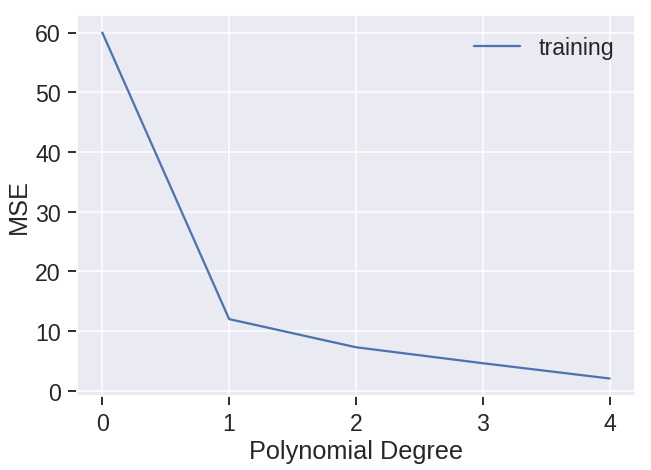

In [19]:
def get_training_mse(degree):
    vehicle_poly_model = Pipeline([
        ('scale', StandardScaler()),                            
        ('poly', PolynomialFeatures(degree=degree)),
        ('model', LinearRegression(fit_intercept=False))
    ])
    
    vehicle_poly_model.fit(numeric_vehicle_training_data, vehicle_training_data[["mpg"]])    
    training_error = mean_squared_error(vehicle_poly_model.predict(numeric_vehicle_training_data), vehicle_training_data[["mpg"]])
    return training_error

mses = np.array([get_training_mse(i) for i in range(5)])
plt.plot(mses)
plt.legend(["training"])
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.savefig("vehicle_data_training", dpi = 300, bbox_inches = "tight")

While training error goes down as we add more and more features, if we also plot the test error, we see that we are overfitting.

In [20]:
def get_training_and_test_mse(degree):
    vehicle_poly_model = Pipeline([
        ('scale', StandardScaler()),                            
        ('poly', PolynomialFeatures(degree=degree)),
        ('model', LinearRegression(fit_intercept=False))
    ])
    
    vehicle_poly_model.fit(numeric_vehicle_training_data, vehicle_training_data[["mpg"]])    
    
    training_error = mean_squared_error(vehicle_poly_model.predict(numeric_vehicle_training_data), vehicle_training_data[["mpg"]])
    test_error = mean_squared_error(vehicle_poly_model.predict(numeric_vehicle_test_data), vehicle_test_data[["mpg"]])
    return training_error, test_error

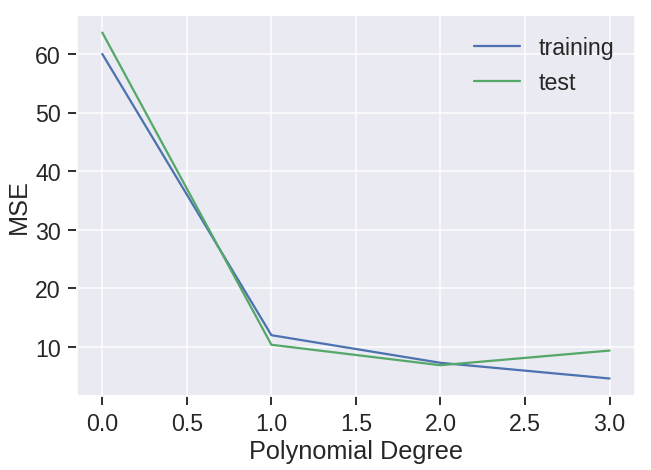

In [23]:
mses = np.array([get_training_and_test_mse(i) for i in range(4)])
plt.plot(mses[:, 0])
plt.plot(mses[:, 1])
plt.legend(["training", "test"])
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.savefig("vehicle_data", dpi = 300, bbox_inches = "tight")

To add a regularization term, we use `linear_model.Ridge` instead of `linear_model.LinearRegression`. sklearn uses `alpha` instead of `lambda` for the hyperparameter.

In [24]:
degree_4_linear_regression_model = Pipeline([        
    ('scale', StandardScaler()),            
    ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.LinearRegression(fit_intercept=False))
])   

degree_4_linear_regression_model.fit(numeric_vehicle_training_data, vehicle_training_data[["mpg"]])
mean_squared_error(degree_4_linear_regression_model.predict(numeric_vehicle_training_data), vehicle_training_data[["mpg"]])

2.0493114787184314

Note that if you pick any alpha greater than 0, the loss on the training set will go up.

In [55]:
degree_4_linear_regression_model = Pipeline([        
    ('scale', StandardScaler()),            
    ('poly', PolynomialFeatures(degree=4)),    
    ('model', linear_model.Ridge(alpha = 1000, fit_intercept=False))
])   

degree_4_linear_regression_model.fit(numeric_vehicle_training_data, vehicle_training_data[["mpg"]])
mean_squared_error(degree_4_linear_regression_model.predict(numeric_vehicle_training_data), vehicle_training_data[["mpg"]])
#mean_squared_error(degree_4_linear_regression_model.predict(numeric_vehicle_test_data), vehicle_test_data[["mpg"]])

109.40958974235362

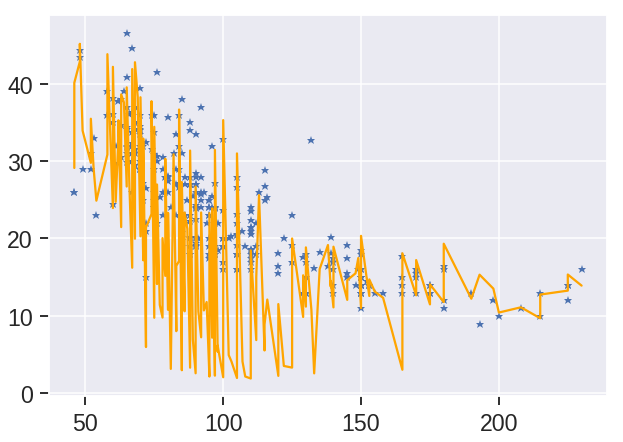

In [56]:
y_hat = degree_4_linear_regression_model.predict(numeric_vehicle_training_data)
y_obs = vehicle_training_data[["mpg"]]
x = numeric_vehicle_training_data[["horsepower"]]
#plt.plot(x, y_obs)
new_x, new_y_obs = zip(*sorted(zip(x.to_numpy(), y_obs.to_numpy())))
plt.plot(new_x, new_y_obs, '*')

new_x, new_y_hat = zip(*sorted(zip(x.to_numpy(), y_hat)))
plt.plot(new_x, new_y_hat, color='orange')


In [57]:
def get_vehicle_ridge_training_and_test_mse_error(alpha):
    model = Pipeline([
        ('scale', StandardScaler()),        
        ('poly', PolynomialFeatures(degree=4)),
        ('model', linear_model.Ridge(alpha=alpha, fit_intercept=False))
    ])    
    
    model.fit(numeric_vehicle_training_data, vehicle_training_data[["mpg"]])
    
    training_mse = mean_squared_error(model.predict(numeric_vehicle_training_data), vehicle_training_data['mpg'])
    test_mse = mean_squared_error(model.predict(numeric_vehicle_test_data), vehicle_test_data['mpg'])

    return training_mse, test_mse

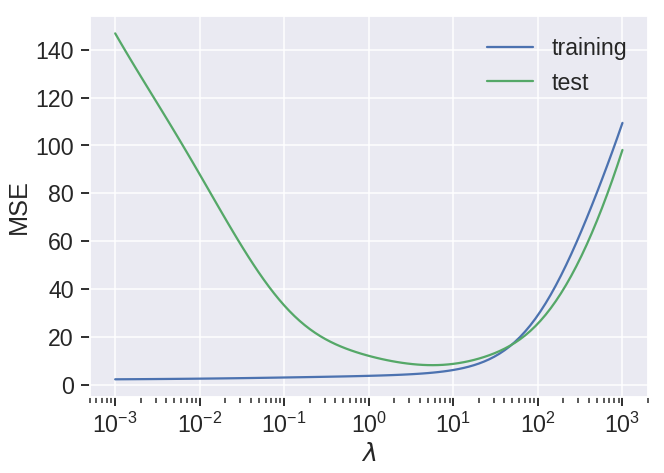

In [58]:
alphas = 10**np.linspace(-3, 3, 100)
mses = np.array([get_vehicle_ridge_training_and_test_mse_error(alpha) for alpha in alphas])
plt.semilogx(alphas, mses[:, 0])
plt.semilogx(alphas, mses[:, 1])
plt.legend(["training", "test"])
plt.xlabel(r'$\lambda$')
plt.ylabel('MSE')
plt.savefig("mse_vs_lambda.png", dpi=300, bbox_inches = "tight")

### Automatic Cross Validation With Ridge Regression

In [59]:
alphas = 10**np.linspace(-3, 3, 100)
degree_4_linear_regression_model = Pipeline([        
    ('scale', StandardScaler()),            
    ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.RidgeCV(alphas = alphas, normalize=True, fit_intercept=False))
])   

degree_4_linear_regression_model.fit(numeric_vehicle_training_data, vehicle_training_data[["mpg"]])
mean_squared_error(degree_4_linear_regression_model.predict(numeric_vehicle_training_data), vehicle_training_data[["mpg"]])

5.8171178393239344

In [20]:
mean_squared_error(degree_4_linear_regression_model.predict(numeric_vehicle_test_data), vehicle_test_data[["mpg"]])

8.479079788759762

In [60]:
degree_4_linear_regression_model.named_steps['model'].alpha_

8.697490026177835

In [61]:
degree_4_linear_regression_model.named_steps['model'].coef_

array([[ 1.48024852e+01, -5.82024131e-01, -1.13521738e+00,
        -2.11374363e+00, -8.27657900e-01, -6.30196098e-01,
         1.15949403e+00,  3.52108887e+00,  2.16100761e+00,
         3.99169688e-01,  1.62249288e+00,  8.14610478e-01,
        -9.09048514e-01,  2.64388284e+00,  2.92165326e-01,
         1.48060158e+00,  5.78120196e-01, -3.69983493e-01,
         8.01092256e-01,  6.45957962e-02, -5.29352525e-01,
        -4.20644216e-01,  1.41838836e+00,  7.09490340e-01,
        -2.63263373e-01,  1.49513410e+00, -1.86243014e-01,
         2.78479101e+00, -5.76344920e-01, -3.39853449e-01,
        -5.48797592e-01, -6.98924610e-01,  5.01081838e-01,
         3.86817963e-01,  1.06073878e-01, -2.64606681e-01,
        -2.90002178e-01,  7.89498817e-01,  4.56303972e-01,
         1.88217046e-01, -6.60333499e-02, -4.49298934e-01,
         9.07938164e-02, -4.13478324e-01, -2.37356770e-02,
         4.13091502e-01,  1.04234950e+00,  4.02629736e-01,
         2.81738485e-01,  1.23792811e-01, -1.57089642e-0

### Automatic Cross Validation With LASSO Regression

In [62]:
alphas = 10**np.linspace(-3, 3, 100)
degree_4_linear_regression_model = Pipeline([        
    ('scale', StandardScaler()),            
    ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.LassoCV(alphas = alphas, normalize=True, fit_intercept=False))
])   

degree_4_linear_regression_model.fit(numeric_vehicle_training_data, vehicle_training_data[["mpg"]])
mean_squared_error(degree_4_linear_regression_model.predict(numeric_vehicle_training_data), vehicle_training_data[["mpg"]])

/home/hug/miniconda2/envs/data100/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hug/miniconda2/envs/data100/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


7.434119241218367

In [63]:
mean_squared_error(degree_4_linear_regression_model.predict(numeric_vehicle_test_data), vehicle_test_data[["mpg"]])

6.067274962629774

In [64]:
degree_4_linear_regression_model.named_steps['model'].alpha_

0.23101297000831603

In [65]:
degree_4_linear_regression_model.named_steps['model'].coef_

array([ 2.08256845e+01, -0.00000000e+00, -3.93896904e-01, -1.07551599e+00,
       -4.52930805e+00, -0.00000000e+00,  1.97758406e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.06917291e-01,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.50569145e-01,  1.54037534e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.01318251e-01,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -9.18928956e-02, -0.00000000e+00,
        0.00000000e+00,  

## Minimizing an Arbitrary 1D Function

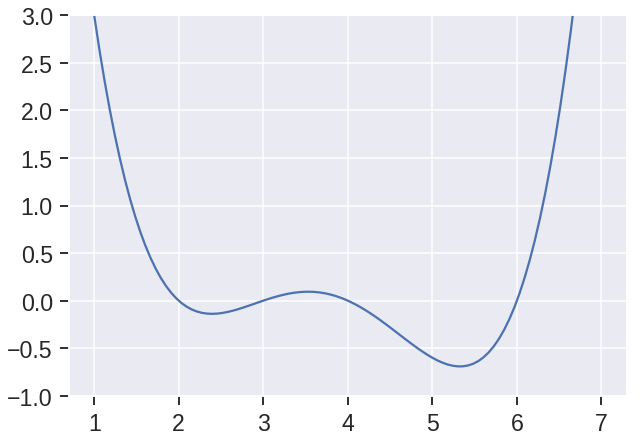

In [66]:
def arbitrary(x):
    return (x**4 - 15*x**3 + 80*x**2 - 180*x + 144)/10

x = np.linspace(1, 7, 100)
plt.plot(x, arbitrary(x))
axes = plt.gca()
axes.set_ylim([-1, 3])
plt.savefig("fx4.png", dpi = 300, bbox_inches = "tight")

Visually, we can see above that the minimum is somewhere around 5.3ish. Let's see if we can figure out how to find the exact minimum algorithmically.

One way very slow and terrible way would be manual guess-and-check.

In [71]:
arbitrary(5.2)

-0.6758399999999483

A somewhat better approach is to use brute force to try out a bunch of x values and return the one that yields the lowest loss.

In [72]:
def simple_minimize(f, xs):
    y = [f(x) for x in xs]  
    return xs[np.argmin(y)]

In [73]:
simple_minimize(arbitrary, np.linspace(1, 7, 20))

5.421052631578947

This process is essentially the same as before where we made a graphical plot, it's just that we're only looking at 20 selected points.

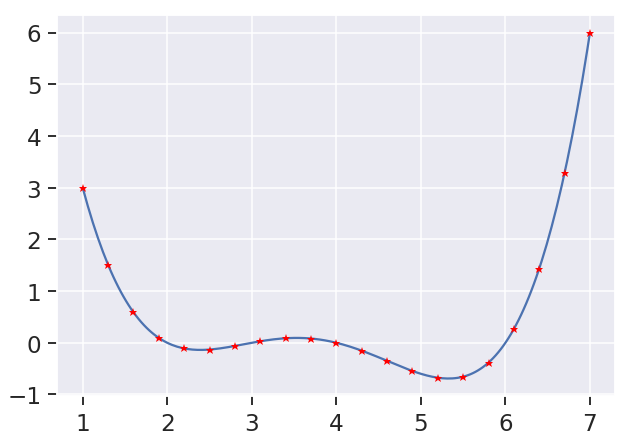

In [33]:
xs = np.linspace(1, 7, 200)
sparse_xs = np.linspace(1, 7, 21)

ys = arbitrary(xs)
sparse_ys = arbitrary(sparse_xs)

plt.plot(xs, ys, label = "f")
plt.plot(sparse_xs, sparse_ys, 'r*', label = "f")
plt.savefig("f_brute_force.png", dpi=300, bbox_inches = "tight")

This basic approach is incredibly inefficient, and suffers from two major flaws:
1. If the minimum is outside our range of guesses, the answer will be completely wrong.
2. Even if our range of guesses is correct, if the guesses are too coarse, our answer will be inaccurate.

### Better Approach: Gradient Descent

Instead of choosing all of our guesses ahead of time, we can instead start from a single guess and try to iteratively improve on our choice. 

They key insight is this: If the derivative of the function is negative, that means the function is decreasing, so we should go to the right (i.e. pick a bigger x). If the derivative of the function is positive, that means the function is increasing, so we should go to the left (i.e. pick a smaller x).

Thus, the derivative tells us which way to go.

In [34]:
#desmos demo: https://www.desmos.com/calculator/twpnylu4lr

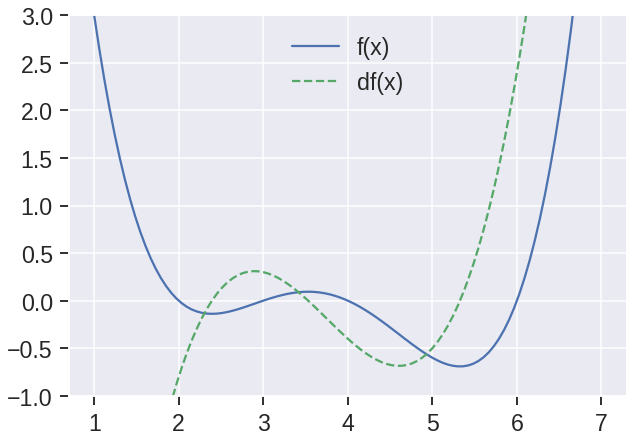

In [74]:
def derivative_arbitrary(x):
    return (4*x**3 - 45*x**2 + 160*x - 180)/10

plt.plot(x, arbitrary(x))
plt.plot(x, derivative_arbitrary(x), '--')
plt.legend(['f(x)', 'df(x)'])
axes = plt.gca()
axes.set_ylim([-1, 3]);

In [75]:
def plot_arbitrary():
    x = np.linspace(1, 7, 100)
    plt.plot(x, arbitrary(x))
    axes = plt.gca()
    axes.set_ylim([-1, 3])
    
def plot_x_on_f(f, x):
    y = f(x)
    default_args = dict(label=r'$ \theta $', zorder=2,
                        s=200, c=sns.xkcd_rgb['green'])
    plt.scatter([x], [y], **default_args)
    
def plot_x_on_f_empty(f, x):
    y = f(x)
    default_args = dict(label=r'$ \theta $', zorder=2,
                        s=200, c = 'none', edgecolor=sns.xkcd_rgb['green'])
    plt.scatter([x], [y], **default_args)    
    
def plot_tangent_on_f(f, x, eps=1e-6):
    slope = ((f(x + eps) - f(x - eps))
             / (2 * eps))
    xs = np.arange(x - 1, x + 1, 0.05)
    ys = f(x) + slope * (xs - x)
    plt.plot(xs, ys, zorder=3, c=sns.xkcd_rgb['green'], linestyle='--')    

Text(0, 0.5, 'f(x)')

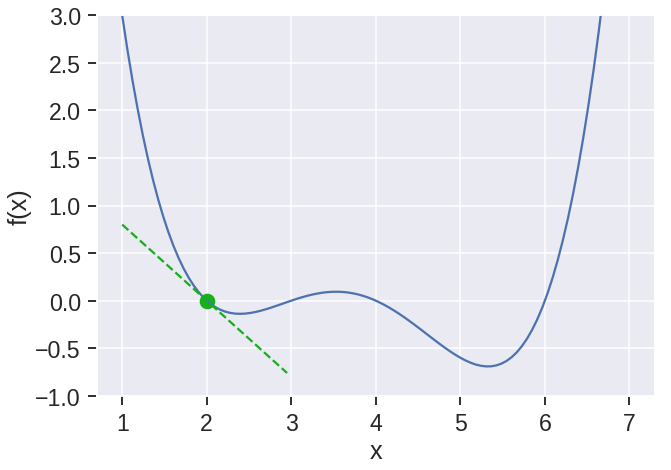

In [77]:
plot_arbitrary()
plot_x_on_f(arbitrary, 2)
plot_tangent_on_f(arbitrary, 2)
plt.xlabel('x')
plt.ylabel('f(x)')
#plt.savefig('dfx_1.png')

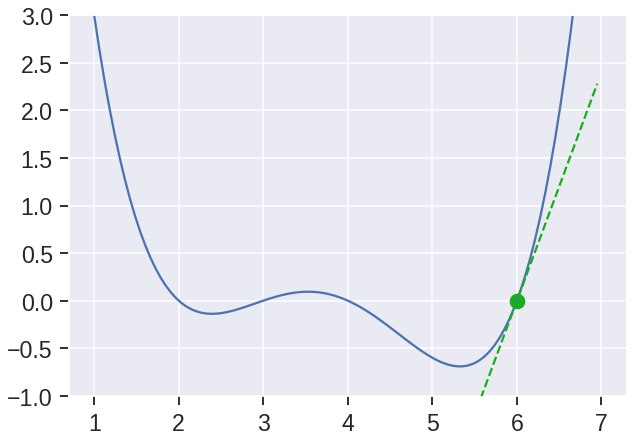

In [78]:
plot_arbitrary()
plot_x_on_f(arbitrary, 6)
plot_tangent_on_f(arbitrary, 6)
#plt.savefig('dfx_2.png')

Armed with this knowledge, let's try to see if we can use the derivative to optimize the function.

In [79]:
derivative_arbitrary(4)

-0.4

In [80]:
derivative_arbitrary(4 + 0.4)

-0.6464000000000055

In [81]:
derivative_arbitrary(4 + 0.4 + 0.64)

-0.45757440000001

In [82]:
derivative_arbitrary(4 + 0.4 + 0.64 + 0.457)

0.4166188892000037

In [39]:
derivative_arbitrary(4)

-0.4

In [40]:
derivative_arbitrary(4 + 0.4)

-0.6464000000000055

In [41]:
derivative_arbitrary(4 + 0.4 + 0.64)

-0.45757440000001

In [42]:
derivative_arbitrary(4 + 0.4 + 0.64 + 0.46)

0.425

In [83]:
def plot_one_step(x):
    new_x = x - derivative_arbitrary(x)
    plot_arbitrary()
    plot_x_on_f(arbitrary, new_x)
    plot_x_on_f_empty(arbitrary, x)
    print(f'old x: {x}')
    print(f'new x: {new_x}')    

old x: 5.080862485230506
new x: 5.4899803921677695


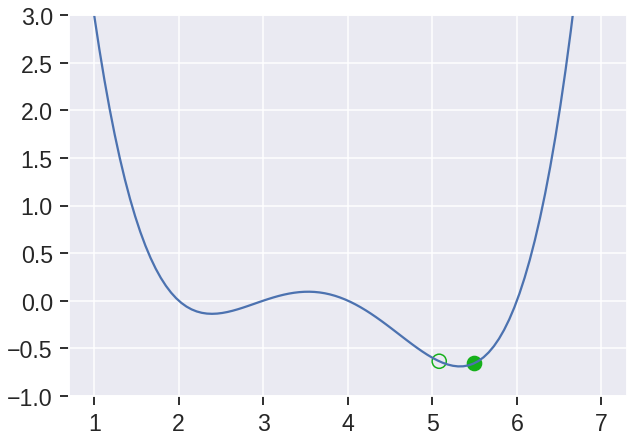

In [88]:
plot_one_step( 5.080862485230506)

In [89]:
def plot_one_step_better(x):
    new_x = x - 0.3 * derivative_arbitrary(x)
    plot_arbitrary()
    plot_x_on_f(arbitrary, new_x)
    plot_x_on_f_empty(arbitrary, x)
    print(f'old x: {x}')
    print(f'new x: {new_x}')    

old x: 5.315427176589101
new x: 5.322260602055931


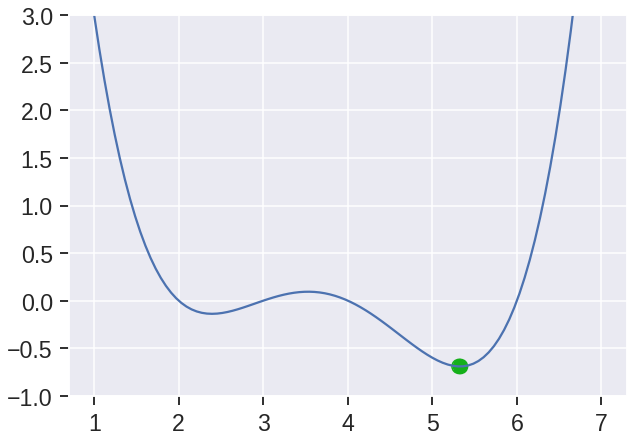

In [100]:
plot_one_step_better(5.315427176589101)

Written as a recurrence relation, the process we've described above is:

$$
x^{(t+1)} = x^{(t)} -  0.3 \frac{d}{dx} f(x)
$$

This algorithm is also known as "gradient descent". 

Given a current $\gamma$, gradient descent creates its next guess for $\gamma$ based on the sign and magnitude of the derivative.

Our choice of 0.3 above was totally arbitrary. Naturally, we can generalize by replacing it with a parameter, typically represented by $\alpha$, and often called the "learning rate".

$$
x^{(t+1)} = x^{(t)} -  \alpha \frac{d}{dx} f(x))
$$

We can also write up this procedure in code as given below:

In [101]:
def gradient_descent(df, initial_guess, alpha, n):
    guesses = [initial_guess]
    guess = initial_guess
    while len(guesses) < n:
        guess = guess - alpha * df(guess)
        guesses.append(guess)
    return np.array(guesses)

In [105]:
trajectory = gradient_descent(derivative_arbitrary, 4, 1.5, 20)
trajectory

array([4.        , 4.6       , 5.6284    , 4.39841721, 5.36714058,
       5.23345463, 5.50301118, 4.85283564, 5.77676546, 3.72284331,
       3.96846217, 4.53018801, 5.55049763, 4.6927978 , 5.70865641,
       4.05220573, 4.7135408 , 5.72270104, 3.98700301, 4.57133193])

Below, we see a visualization of the trajectory taken by this algorithm.

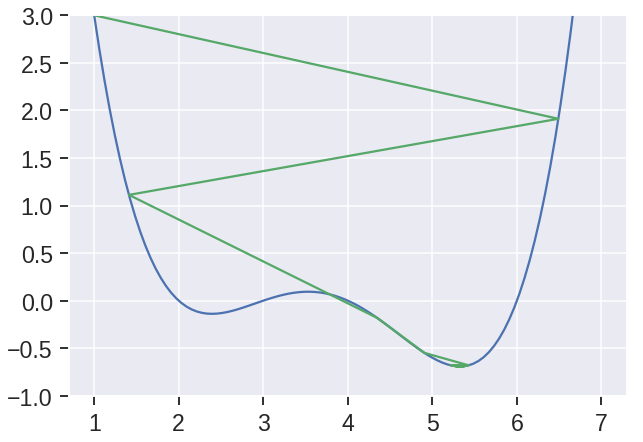

In [113]:
trajectory = gradient_descent(derivative_arbitrary, 1, 0.9, 20)
plot_arbitrary()
plt.plot(trajectory, arbitrary(trajectory))

Above, we've simply run our algorithm a fixed number of times. More sophisticated implementations will stop based on a variety of different stopping criteria, e.g. error getting too small, error getting too large, etc. We will not discuss these in our course.

In the next lecture, we'll return to the world of data science and see how this procedure might be useful for optimizing models.